Optimal Number of Clusters: 2


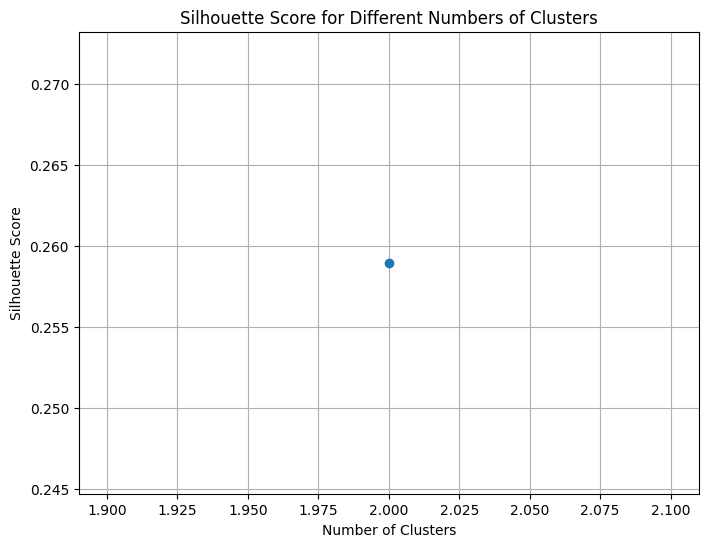

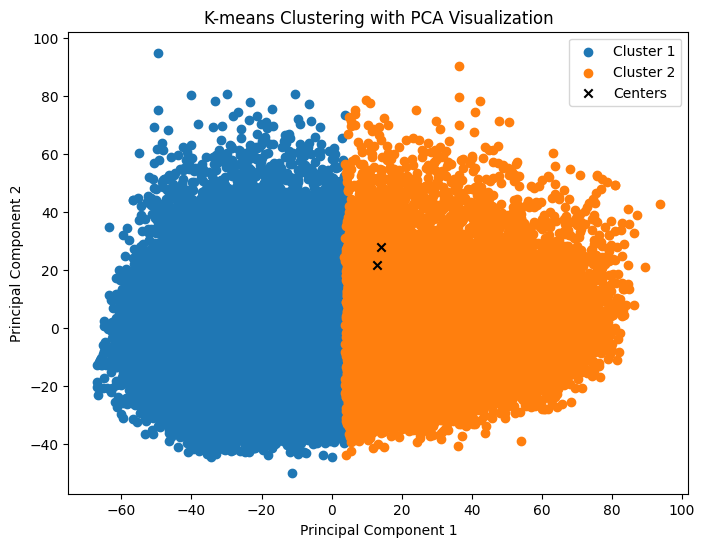

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

class KMeansClustering:
    def __init__(self, num_clusters, max_iters=300, n_init=10):
        self.K = num_clusters
        self.max_iters = max_iters
        self.n_init = n_init

    def fit(self, X):
        self.centers = X[np.random.choice(range(len(X)), self.K, replace=False)]
        
        for _ in range(self.max_iters):
            labels = self.assign_labels(X)
            new_centers = self.update_centers(X, labels)
            
            if np.allclose(self.centers, new_centers):  
                break
                
            self.centers = new_centers
        
        return labels
    
    def assign_labels(self, X):
        return np.argmin(np.linalg.norm(X[:, None] - self.centers, axis=2), axis=1)
    
    def update_centers(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.K)])

def find_optimal_clusters(X, max_clusters=10, n_init=10):
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeansClustering(num_clusters=i, n_init=n_init)
        labels = kmeans.fit(X)
        
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

# Load data from CSV file
file_path = "/home/gllaizz/Downloads/Clustering_dataset/weatherAUS.csv"  # Update with your CSV file path
data = pd.read_csv(file_path)

# Drop non-numeric columns and rows with missing values
data_numeric = data.select_dtypes(include=np.number).dropna()
X = data_numeric.values

# Find the optimal number of clusters using silhouette score
optimal_clusters = find_optimal_clusters(X, n_init=10)  # Explicitly set n_init
print("Optimal Number of Clusters:", optimal_clusters)

# Fit K-means with the optimal number of clusters
kmeans = KMeansClustering(num_clusters=optimal_clusters, n_init=10)  # Explicitly set n_init
labels = kmeans.fit(X)
centers = kmeans.centers

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot silhouette score graph
silhouette_scores = []
for i in range(2, optimal_clusters + 1):
    kmeans = KMeansClustering(num_clusters=i, n_init=10)  # Explicitly set n_init
    labels = kmeans.fit(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, optimal_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', label='Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.legend()
plt.show()  # Ensure plots are displayed


Optimal Number of Clusters: 2


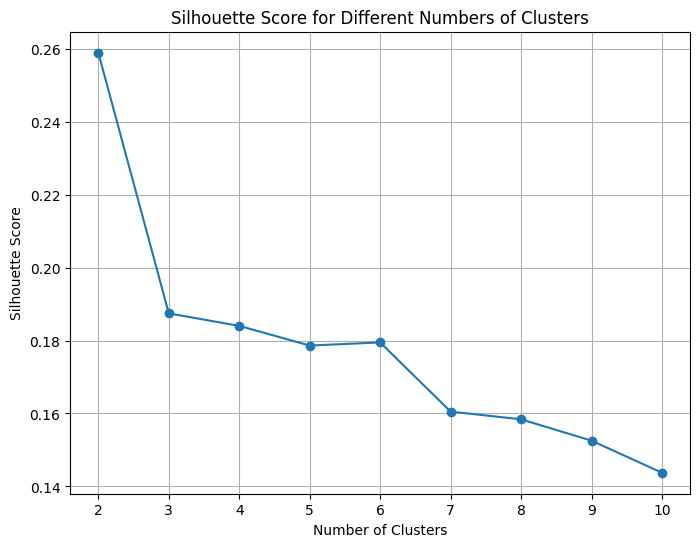

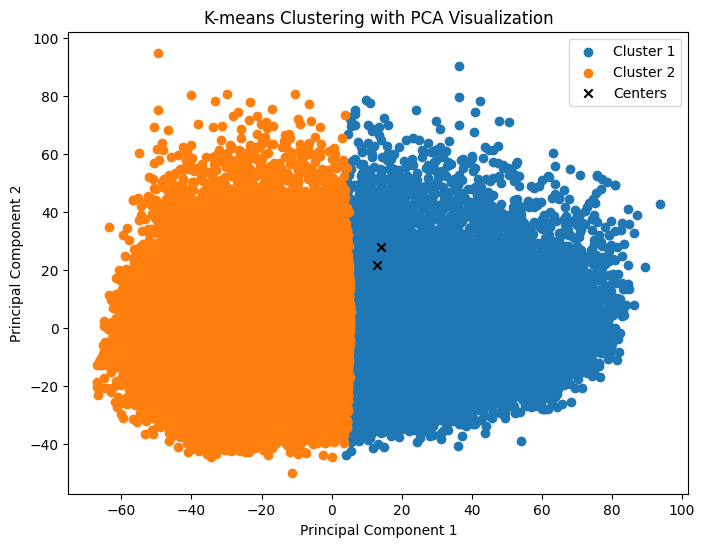

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

class KMeansClustering:
    def __init__(self, num_clusters, max_iters=300, n_init=10):
        self.K = num_clusters
        self.max_iters = max_iters
        self.n_init = n_init

    def fit(self, X):
        self.centers = X[np.random.choice(range(len(X)), self.K, replace=False)]
        
        for _ in range(self.max_iters):
            labels = self.assign_labels(X)
            new_centers = self.update_centers(X, labels)
            
            if np.allclose(self.centers, new_centers):  
                break
                
            self.centers = new_centers
        
        return labels
    
    def assign_labels(self, X):
        return np.argmin(np.linalg.norm(X[:, None] - self.centers, axis=2), axis=1)
    
    def update_centers(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.K)])

def find_optimal_clusters(X, max_clusters=10, n_init=10):
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeansClustering(num_clusters=i, n_init=n_init)
        labels = kmeans.fit(X)
        
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

def plot_silhouette_scores(X, max_clusters=10, n_init=10):
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeansClustering(num_clusters=i, n_init=n_init)
        labels = kmeans.fit(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.grid(True)
    plt.show()

# Load data from CSV file
file_path = "/home/gllaizz/Downloads/Clustering_dataset/weatherAUS.csv"  # Update with your CSV file path
data = pd.read_csv(file_path)

# Drop non-numeric columns and rows with missing values
data_numeric = data.select_dtypes(include=np.number).dropna()
X = data_numeric.values

# Find the optimal number of clusters using silhouette score
optimal_clusters = find_optimal_clusters(X, n_init=10)
print("Optimal Number of Clusters:", optimal_clusters)

# Plot silhouette score graph
plot_silhouette_scores(X, max_clusters=10, n_init=10)

# Fit K-means with the optimal number of clusters
kmeans = KMeansClustering(num_clusters=optimal_clusters, n_init=10)
labels = kmeans.fit(X)
centers = kmeans.centers

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', label='Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.legend()
plt.show()  # Ensure plots are displayed
